In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
(train_data,train_target),(test_data,test_target) = mnist.load_data()

Target labels:  [0 1 5 1 1 5 5 3 9 5]


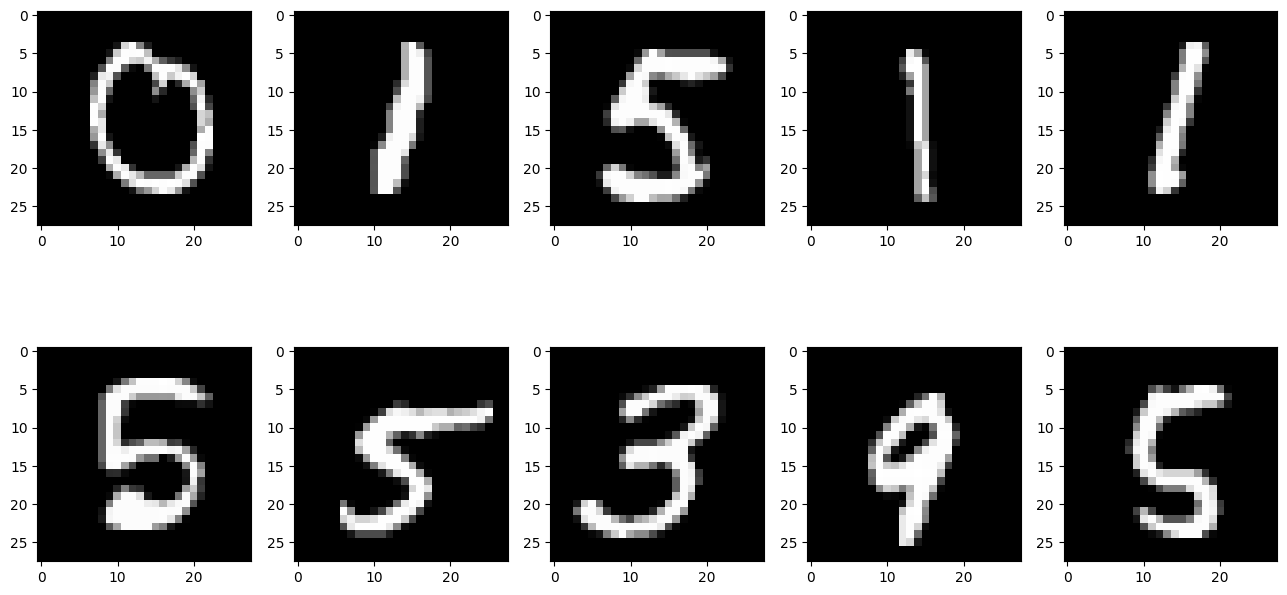

In [ ]:
fig, axs = plt.subplots(2, 5, figsize=(16,8))
random_numbers = np.random.randint(0, 60000, 10)
print('Target labels: ',train_target[random_numbers])
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(train_data[random_numbers[idx]],cmap='gray')
plt.show()

In [ ]:
new_train_data = train_data/255.0
new_test_data=test_data/255.0

new_train_target = to_categorical(train_target)
new_test_target = to_categorical(test_target)

In [ ]:
model=Sequential()

model.add(Flatten(input_shape=(28,28)))

model.add(Dense(128,activation='relu',kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)))
model.add(Dense(64,input_dim=64,activation='relu',kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)))
model.add(Dense(32,input_dim=64,activation='relu'))
model.add(Dense(10,input_dim=32,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 784)               0         
                                                                 
 dense_32 (Dense)            (None, 128)               100480    
                                                                 
 dense_33 (Dense)            (None, 64)                8256      
                                                                 
 dense_34 (Dense)            (None, 32)                2080      
                                                                 
 dense_35 (Dense)            (None, 10)                330       
                                                                 
Total params: 111146 (434.16 KB)
Trainable params: 111146 (434.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [79]:
train_info = model.fit(new_train_data , new_train_target , epochs = 50, batch_size=32)

Epoch 1/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3088 - accuracy: 0.9555
Epoch 2/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3083 - accuracy: 0.9558
Epoch 3/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3093 - accuracy: 0.9561
Epoch 4/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3082 - accuracy: 0.9550
Epoch 5/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3032 - accuracy: 0.9570
Epoch 6/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3065 - accuracy: 0.9564
Epoch 7/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3041 - accuracy: 0.9574
Epoch 8/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3032 - accuracy: 0.9575
Epoch 9/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3028 - accuracy: 0.9572
Epoch 10/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.301

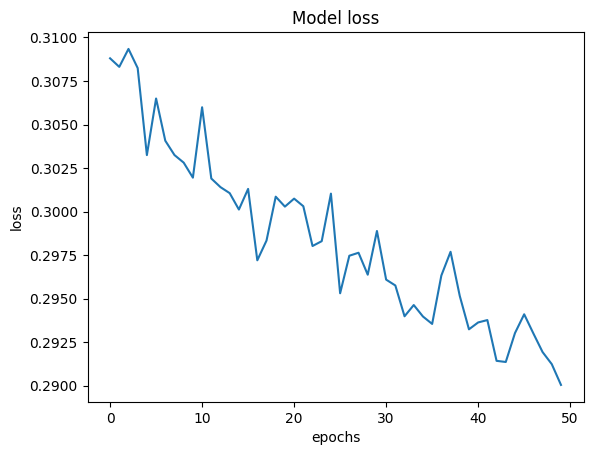

In [80]:
plt.plot(train_info.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Model loss')
plt.show()

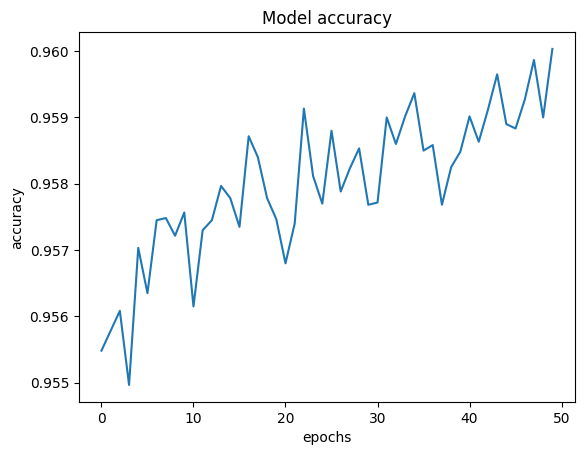

In [81]:
plt.plot(train_info.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Model accuracy')
plt.show()

In [82]:
loss, acc = model.evaluate(new_test_data , new_test_target)
print(f'Loss of the Test dataset is: {loss}\nAccuracy of the test dataset is: {acc}')

313/313 [==============================] - 1s 2ms/step - loss: 0.2983 - accuracy: 0.9564
Loss of the Test dataset is: 0.29826268553733826
Accuracy of the test dataset is: 0.9563999772071838


In [83]:
model.save_weights('MNIST_WEIGHTS_V1.h5')

313/313 [==============================] - 1s 3ms/step


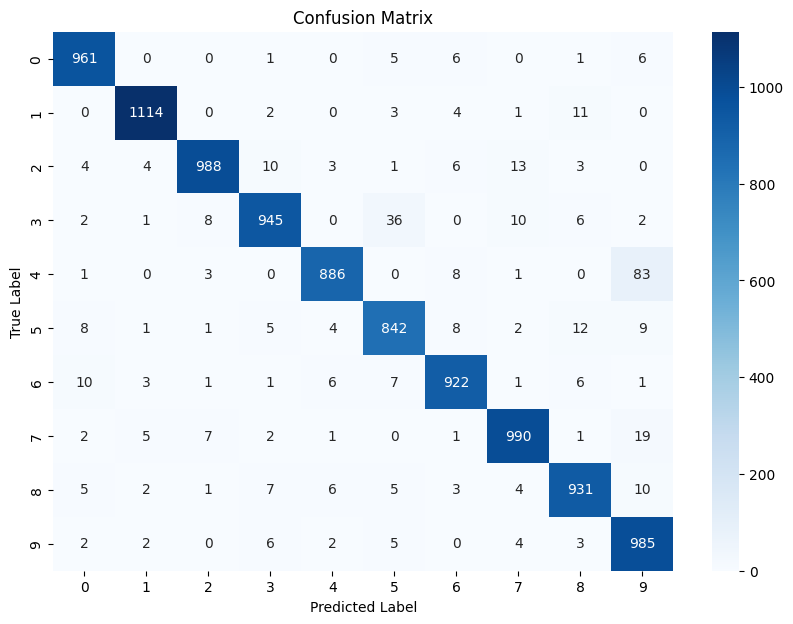

In [84]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predict the classes of the test data
predictions = model.predict(new_test_data)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(new_test_target, axis=1)

# Generate the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Plot the confusion matrix using a heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
